In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

C:\Users\gobba\AppData\Local\Temp\ipykernel_756\2078327416.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
Matplotlib is building the font cache; this may take a moment.


In [2]:
start='2013-01-01'
end='2023-12-21'
stock='GOOG'

data=yf.download(stock,start,end)

C:\Users\gobba\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2757,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2758,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2759,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800
2760,2023-12-19,138.000000,138.770004,137.449997,138.100006,138.100006,20661000


In [7]:
ma_100_days=data.Close.rolling(100).mean()

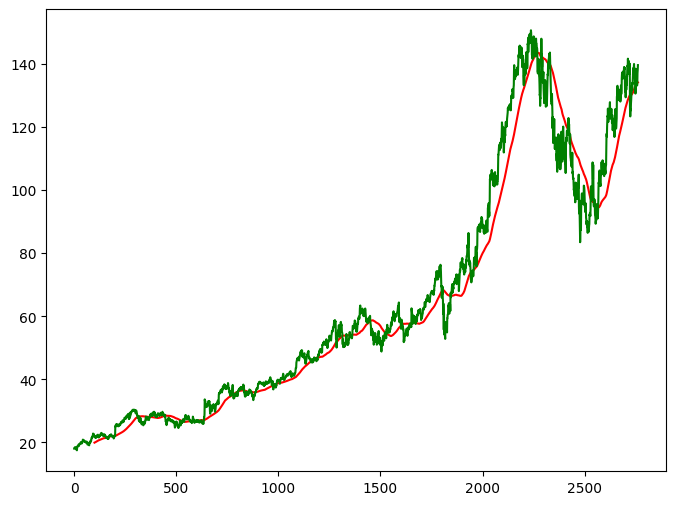

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [11]:
ma_200_days=data.Close.rolling(200).mean()

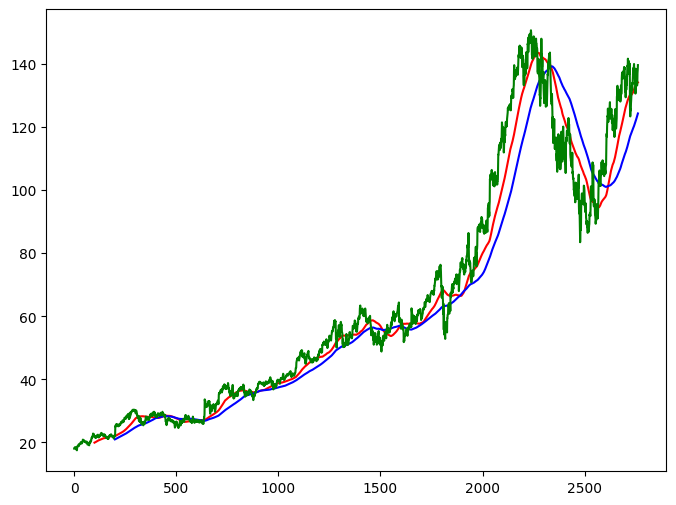

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [15]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [16]:
data_train.shape[0]

2209

In [17]:
data_test.shape[0]

553

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [21]:
data_train_scale=scaler.fit_transform(data_train)

In [26]:
x=[]
y=[]

for  i in range(100,data_train_scale.shape[0]):
     x.append(data_train_scale[i-100:i])
     y.append(data_train_scale[i,0])

In [34]:
x,y=np.array(x),np.array(y)

In [32]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [41]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [42]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [40]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50

66/66 [==============================] - 16s 154ms/step - loss: 0.0549
Epoch 2/50
66/66 [==============================] - 10s 151ms/step - loss: 0.0478
Epoch 3/50
66/66 [==============================] - 10s 152ms/step - loss: 0.0471
Epoch 4/50
66/66 [==============================] - 10s 155ms/step - loss: 0.0467
Epoch 5/50
66/66 [==============================] - 10s 154ms/step - loss: 0.0468
Epoch 6/50
66/66 [==============================] - 10s 154ms/step - loss: 0.0466
Epoch 7/50
66/66 [==============================] - 15s 229ms/step - loss: 0.0463
Epoch 8/50
66/66 [==============================] - 12s 183ms/step - loss: 0.0463
Epoch 9/50
66/66 [==============================] - 10s 152ms/step - loss: 0.0462
Epoch 10/50
66/66 [==============================] - 10s 153ms/step - loss: 0.0460
Epoch 11/50
66/66 [==============================] - 10s 152ms/step - loss: 0.0460
Epoch 12/50
66/66 [==============================] - 14s 215ms/step - loss: 0.0460
Epoch 13/50


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [45]:
pas_100_days=data_train.tail(100)

In [47]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [50]:
data_test_scale=scaler.fit_transform(data_test)

In [55]:
x=[]
y=[]

for  i in range(100,data_test_scale.shape[0]):
     x.append(data_test_scale[i-100:i])
     y.append(data_test_scale[i,0])
x, y=np.array(x), np.array(y)

In [58]:
y_predict=model.predict(x)

18/18 [==============================] - 1s 73ms/step


In [62]:
scale=1/scaler.scale_

In [63]:
y_predict=y_predict*scale

In [64]:
y=y*scale

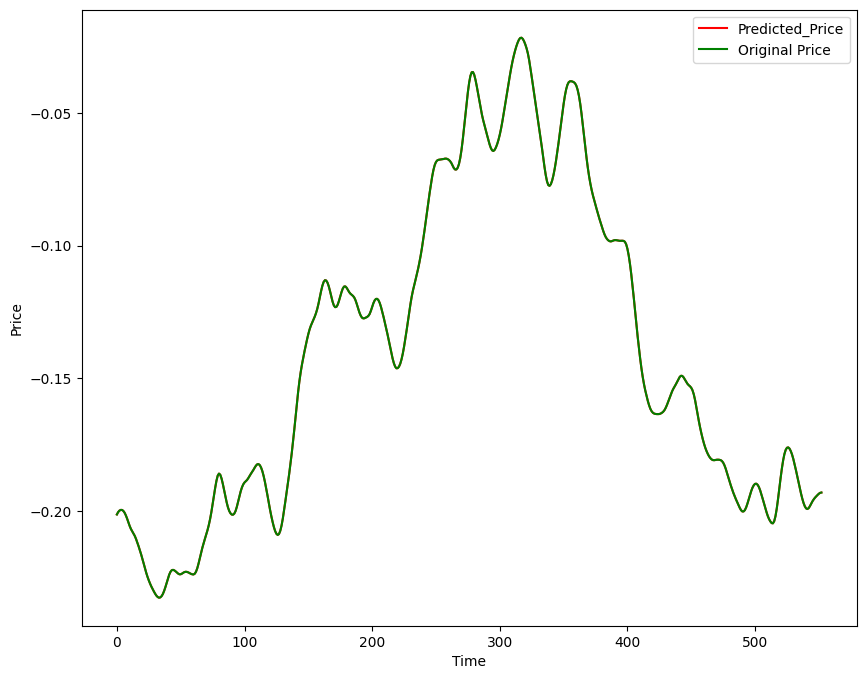

In [69]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted_Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
model.save('stock Prediction Model.keras')